# Day 2: Data Cleaning & Exploratory Data Analysis

### Day 1 Recap & Day 2 Overview
- Reviewed Python fundamentals (NumPy, Pandas, Matplotlib, Seaborn)
- Explored a dataset of 3,500+ transactions
- Learned basic data analysis & visualization

**Day 2 Focus:**
1. Data Cleaning
2. Exploratory Data Analysis (EDA)
3. Visualization & Time Series Analysis


### Importing libraries

---





In [2]:
import pandas as pd              # For working with data tables
import numpy as np               # For math operations
import matplotlib.pyplot as plt  # For making charts
import seaborn as sns           # For making prettier charts

In [3]:
# Configure display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

### Loading the Dataset




In [4]:
# Load the data from the file
df = pd.read_csv('Sales_Transactions_3500.csv')

print("Data loaded successfully!")
print(f"We have {len(df)} sales records (rows)")
print(f"Each record has {len(df.columns)} pieces of information (columns)")

Data loaded successfully!
We have 3500 sales records (rows)
Each record has 12 pieces of information (columns)


In [5]:
# Preview dataset
df.head()

,OrderID,CustomerID,Gender,Age,Product,Category,Quantity,Price,TotalAmount,PaymentMethod,Region,PurchaseDate
0,O00001,C0435,Female,59.0,T-shirt,Fashion,1,369.82,369.82,MobileMoney,East,2025-03-30
1,O00002,C1337,Female,19.0,Jacket,Fashion,2,232.29,464.58,BankTransfer,North,2025-04-11
2,O00003,C0619,Male,28.0,Lipstick,Beauty,1,347.79,347.79,Cash,East,2024-07-14
3,O00004,C0033,Female,58.0,Vacuum Cleaner,Home,5,336.92,1684.60,Card,North,2024-05-24
4,O00005,C1199,Male,25.0,Smartphone,Electronics,1,85.37,85.37,MobileMoney,South,2025-05-10


In [6]:
# What columns do we have?
print("\n--- Column Names ---")
print(df.columns.tolist())


--- Column Names ---
['OrderID', 'CustomerID', 'Gender', 'Age', 'Product', 'Category', 'Quantity', 'Price', 'TotalAmount', 'PaymentMethod', 'Region', 'PurchaseDate']


In [7]:
# What type of data is in each column?
print("\n--- Data Types ---")
print(df.dtypes)


--- Data Types ---
OrderID           object
CustomerID        object
Gender            object
Age              float64
Product           object
Category          object
Quantity           int64
Price            float64
TotalAmount      float64
PaymentMethod     object
Region            object
PurchaseDate      object
dtype: object


In [8]:
# Quick summary
print("\n--- Quick Summary ---")
df.info()


--- Quick Summary ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3500 entries, 0 to 3499
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   OrderID        3500 non-null   object 
 1   CustomerID     3500 non-null   object 
 2   Gender         3500 non-null   object 
 3   Age            3106 non-null   float64
 4   Product        3500 non-null   object 
 5   Category       3500 non-null   object 
 6   Quantity       3500 non-null   int64  
 7   Price          3500 non-null   float64
 8   TotalAmount    3500 non-null   float64
 9   PaymentMethod  3500 non-null   object 
 10  Region         3500 non-null   object 
 11  PurchaseDate   3500 non-null   object 
dtypes: float64(3), int64(1), object(8)
memory usage: 328.3+ KB


### Checking Data quality

In [9]:
# Check for missing values
print("\n--- Missing Values Check ---")
missing = df.isnull().sum()
# missing
print(missing[missing > 0])


--- Missing Values Check ---
Age    394
dtype: int64


In [10]:
if missing.sum() == 0:
    print("Great! No missing values found.")
else:
    print(f"\nTotal missing values: {missing.sum()}")
    # Show percentage
    missing_pct = (missing / len(df)) * 100
    print("\nPercentage missing:")
    print(missing_pct[missing_pct > 0].round(2))


Total missing values: 394

Percentage missing:
Age    11.26
dtype: float64


In [11]:
# Check for duplicates
duplicates = df.duplicated().sum()
print(f"\n--- Duplicate Rows: {duplicates} ---")


--- Duplicate Rows: 0 ---


### Handling the missing values

Method 1: Remove rows with missing ages

This is simple but we lose data

In [12]:
df_method1 = df.dropna(subset=['Age'])
print(f"\nMethod 1 - Remove missing: {len(df_method1)} rows remaining")
print(f"   We lost {len(df) - len(df_method1)} rows")


Method 1 - Remove missing: 3106 rows remaining
   We lost 394 rows


Method 2: Fill with the average (mean)

Replace missing ages with the average age

In [13]:
average_age = df['Age'].mean()
df_method2 = df.copy()
df_method2['Age'].fillna(average_age, inplace=True)
print(f"\nMethod 2 - Fill with average: {average_age:.1f} years")
print(f"   All {len(df_method2)} rows kept")


Method 2 - Fill with average: 40.9 years
   All 3500 rows kept


C:\Users\sumai\AppData\Local\Temp\ipykernel_24748\2275517182.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_method2['Age'].fillna(average_age, inplace=True)


Method 3: Fill with the median (middle value)

Median is better when you have outliers

In [14]:
median_age = df['Age'].median()
df_method3 = df.copy()
df_method3['Age'].fillna(median_age, inplace=True)
print(f"\nMethod 3 - Fill with median: {median_age:.1f} years")
print(f"   All {len(df_method3)} rows kept")


Method 3 - Fill with median: 41.0 years
   All 3500 rows kept


C:\Users\sumai\AppData\Local\Temp\ipykernel_24748\1289970461.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_method3['Age'].fillna(median_age, inplace=True)


Method 4: Fill based on other information
For example, fill with average age by gender

In [15]:
print("\nMethod 4 - Fill based on gender:")
avg_age_by_gender = df.groupby('Gender')['Age'].mean()
print(avg_age_by_gender.round(1))

df_method4 = df.copy()
for gender in df_method4['Gender'].unique():
    mask = (df_method4['Gender'] == gender) & (df_method4['Age'].isnull())
    df_method4.loc[mask, 'Age'] = avg_age_by_gender[gender]

print(f"   Filled missing ages based on gender averages")


Method 4 - Fill based on gender:
Gender
Female    40.6
Male      41.1
Name: Age, dtype: float64
   Filled missing ages based on gender averages


Which method should we use?

Let's compare them visually

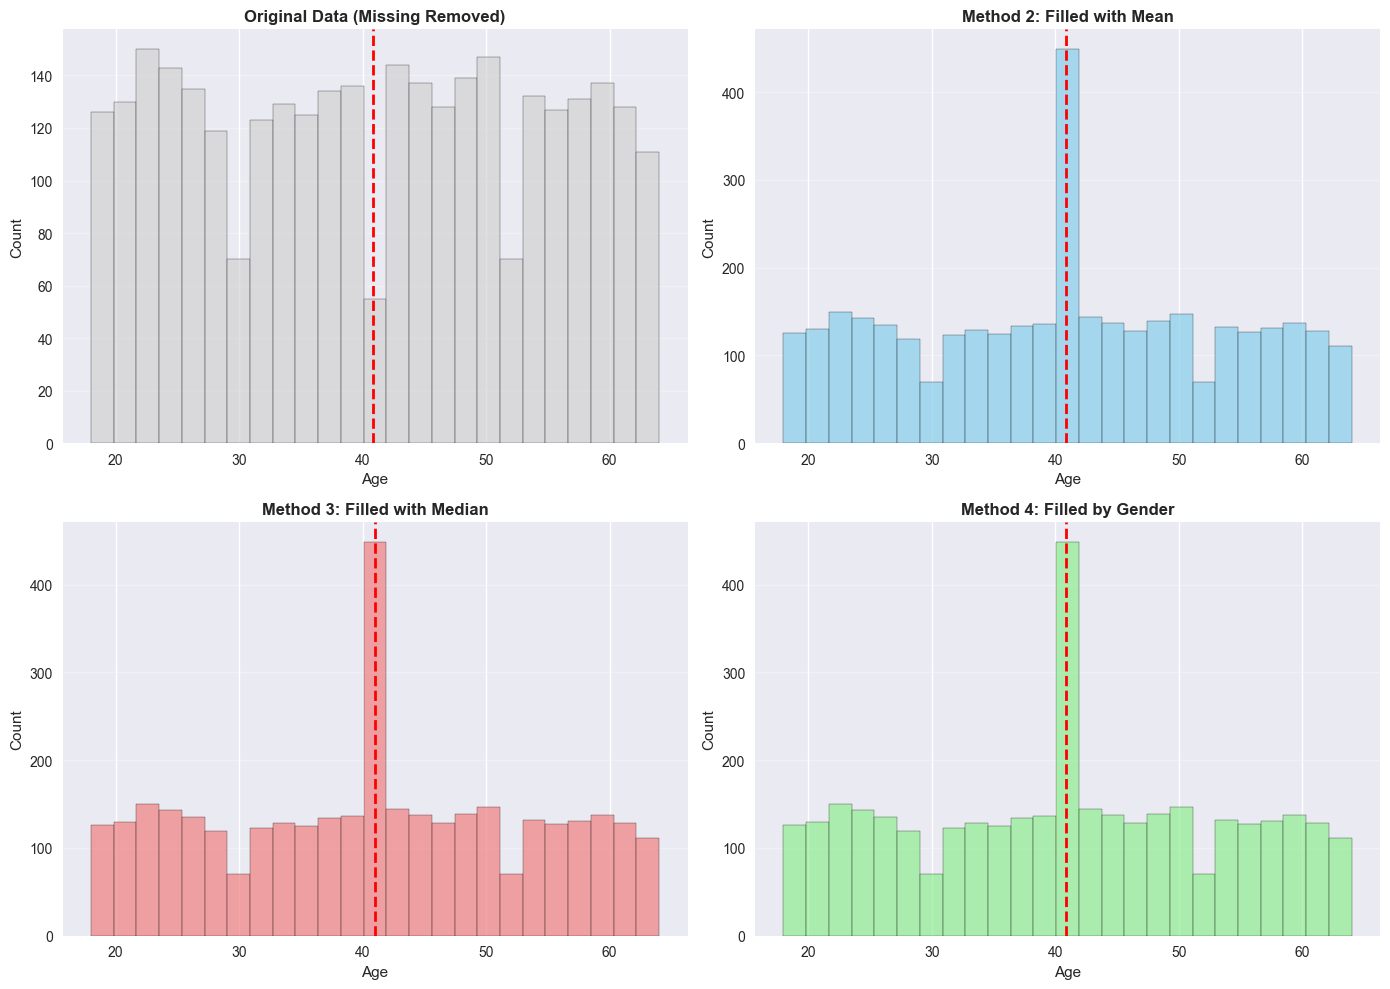

In [16]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Original data (with missing removed for plotting)
axes[0, 0].hist(df['Age'].dropna(), bins=25, color='lightgray', edgecolor='black', alpha=0.7)
axes[0, 0].axvline(df['Age'].mean(), color='red', linestyle='--', linewidth=2)
axes[0, 0].set_title('Original Data (Missing Removed)', fontweight='bold')
axes[0, 0].set_xlabel('Age')
axes[0, 0].set_ylabel('Count')
axes[0, 0].grid(axis='y', alpha=0.3)

# Method 2: Mean
axes[0, 1].hist(df_method2['Age'], bins=25, color='skyblue', edgecolor='black', alpha=0.7)
axes[0, 1].axvline(average_age, color='red', linestyle='--', linewidth=2)
axes[0, 1].set_title('Method 2: Filled with Mean', fontweight='bold')
axes[0, 1].set_xlabel('Age')
axes[0, 1].set_ylabel('Count')
axes[0, 1].grid(axis='y', alpha=0.3)

# Method 3: Median
axes[1, 0].hist(df_method3['Age'], bins=25, color='lightcoral', edgecolor='black', alpha=0.7)
axes[1, 0].axvline(median_age, color='red', linestyle='--', linewidth=2)
axes[1, 0].set_title('Method 3: Filled with Median', fontweight='bold')
axes[1, 0].set_xlabel('Age')
axes[1, 0].set_ylabel('Count')
axes[1, 0].grid(axis='y', alpha=0.3)

# Method 4: Gender-based
axes[1, 1].hist(df_method4['Age'], bins=25, color='lightgreen', edgecolor='black', alpha=0.7)
axes[1, 1].axvline(df_method4['Age'].mean(), color='red', linestyle='--', linewidth=2)
axes[1, 1].set_title('Method 4: Filled by Gender', fontweight='bold')
axes[1, 1].set_xlabel('Age')
axes[1, 1].set_ylabel('Count')
axes[1, 1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

In [17]:
# Apply the chosen method to our main dataframe
df['Age'].fillna(df['Age'].median(), inplace=True)

print(f"\nMissing ages now: {df['Age'].isnull().sum()}")
print("All age values are now complete!")


Missing ages now: 0
All age values are now complete!


C:\Users\sumai\AppData\Local\Temp\ipykernel_24748\3809145186.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)


### Understanding Our Numbers

 We'll calculate:
 - Average (mean)
 - Middle value (median)
 - Smallest and largest values
 - Standard deviation (how spread out the values are)

In [18]:
print("\n--- Summary Statistics ---")
print(df.describe().round(2))


--- Summary Statistics ---
           Age  Quantity    Price  TotalAmount
count  3500.00   3500.00  3500.00      3500.00
mean     40.88      3.01   248.33       745.76
std      12.71      1.42   143.39       587.72
min      18.00      1.00     5.20         5.25
25%      31.00      2.00   120.77       280.90
50%      41.00      3.00   249.00       575.99
75%      51.00      4.00   369.49      1110.33
max      64.00      5.00   499.90      2494.00


In [19]:
# Let's focus on important columns

print("\n--- Price Information ---")
print(f"Average Price: ${df['Price'].mean():.2f}")
print(f"Median Price: ${df['Price'].median():.2f}")
print(f"Cheapest Item: ${df['Price'].min():.2f}")
print(f"Most Expensive Item: ${df['Price'].max():.2f}")

print("\n--- Transaction Information ---")
print(f"Average Transaction: ${df['TotalAmount'].mean():.2f}")
print(f"Total Revenue: ${df['TotalAmount'].sum():,.2f}")
print(f"Average Items per Order: {df['Quantity'].mean():.2f}")

print("\n--- Customer Information ---")
print(f"Average Customer Age: {df['Age'].mean():.1f} years")
print(f"Youngest Customer: {df['Age'].min():.0f} years")
print(f"Oldest Customer: {df['Age'].max():.0f} years")



--- Price Information ---
Average Price: $248.33
Median Price: $249.00
Cheapest Item: $5.20
Most Expensive Item: $499.90

--- Transaction Information ---
Average Transaction: $745.76
Total Revenue: $2,610,147.55
Average Items per Order: 3.01

--- Customer Information ---
Average Customer Age: 40.9 years
Youngest Customer: 18 years
Oldest Customer: 64 years


Let's look at non-numeric data

In [20]:
# Let's count things like gender, regions, and product categories

print("\n--- Gender Distribution ---")
print(df['Gender'].value_counts())

print("\n--- Region Distribution ---")
print(df['Region'].value_counts())

print("\n--- Product Category Distribution ---")
print(df['Category'].value_counts())

print("\n--- Payment Method Distribution ---")
print(df['PaymentMethod'].value_counts())


--- Gender Distribution ---
Gender
Female    1768
Male      1732
Name: count, dtype: int64

--- Region Distribution ---
Region
South    892
North    876
West     874
East     858
Name: count, dtype: int64

--- Product Category Distribution ---
Category
Beauty         921
Home           887
Fashion        853
Electronics    839
Name: count, dtype: int64

--- Payment Method Distribution ---
PaymentMethod
Card            903
Cash            889
BankTransfer    882
MobileMoney     826
Name: count, dtype: int64


### Visualizations

Visualization 1: Age Distribution

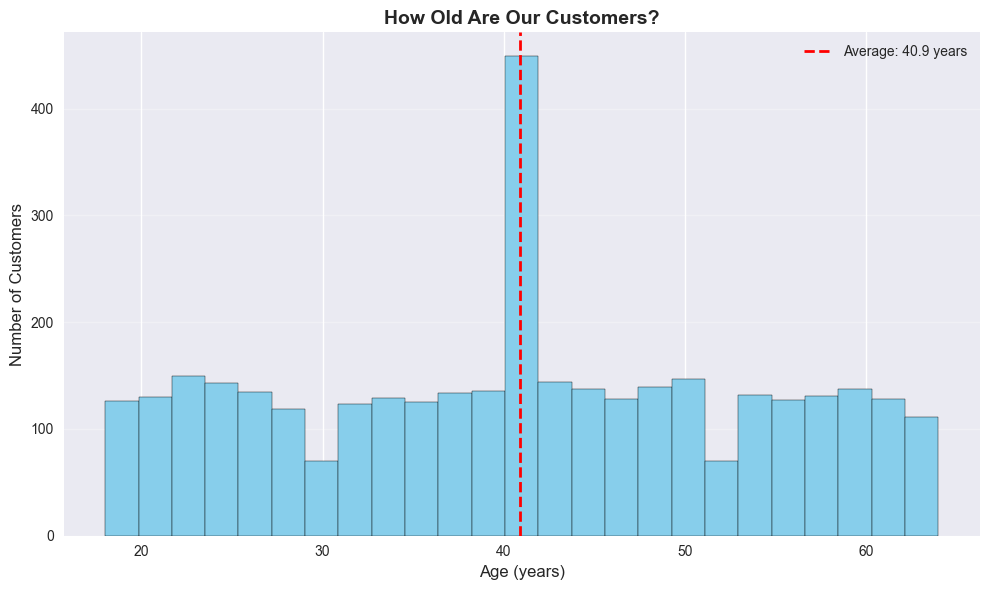

This chart shows us the age range of our customers.
The red line shows the average age.


In [22]:
# Let's see how old our customers are

plt.figure(figsize=(10, 6))
plt.hist(df['Age'].dropna(), bins=25, color='skyblue', edgecolor='black')
plt.axvline(df['Age'].mean(), color='red', linestyle='--',
            linewidth=2, label=f'Average: {df["Age"].mean():.1f} years')
plt.xlabel('Age (years)', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.title('How Old Are Our Customers?', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print("This chart shows us the age range of our customers.")
print("The red line shows the average age.")

Visualization 2: Sales by Category

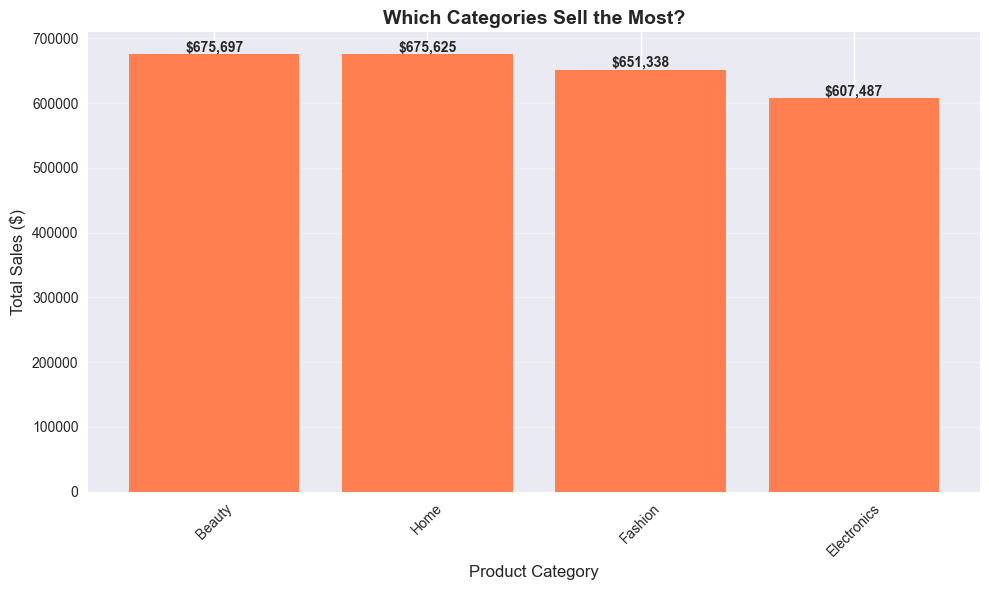

In [23]:
plt.figure(figsize=(10, 6))
category_sales = df.groupby('Category')['TotalAmount'].sum().sort_values(ascending=False)
plt.bar(category_sales.index, category_sales.values, color='coral')
plt.xlabel('Product Category', fontsize=12)
plt.ylabel('Total Sales ($)', fontsize=12)
plt.title('Which Categories Sell the Most?', fontsize=14, fontweight='bold')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)

# Add value labels on bars
for i, v in enumerate(category_sales.values):
    plt.text(i, v, f'${v:,.0f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

Visualization 3: Sales by Region

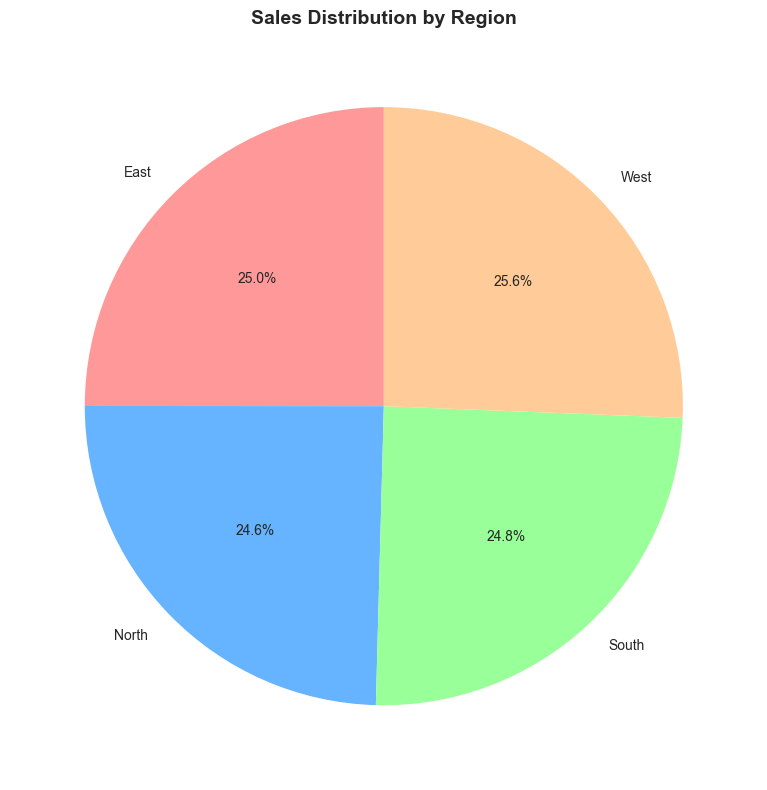

This pie chart shows what percentage of sales comes from each region.


In [24]:
# Which region brings in the most revenue?

plt.figure(figsize=(8, 8))
region_sales = df.groupby('Region')['TotalAmount'].sum()
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99']
plt.pie(region_sales, labels=region_sales.index, autopct='%1.1f%%',
        colors=colors, startangle=90)
plt.title('Sales Distribution by Region', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("This pie chart shows what percentage of sales comes from each region.")

Visualization 4: Price Distribution

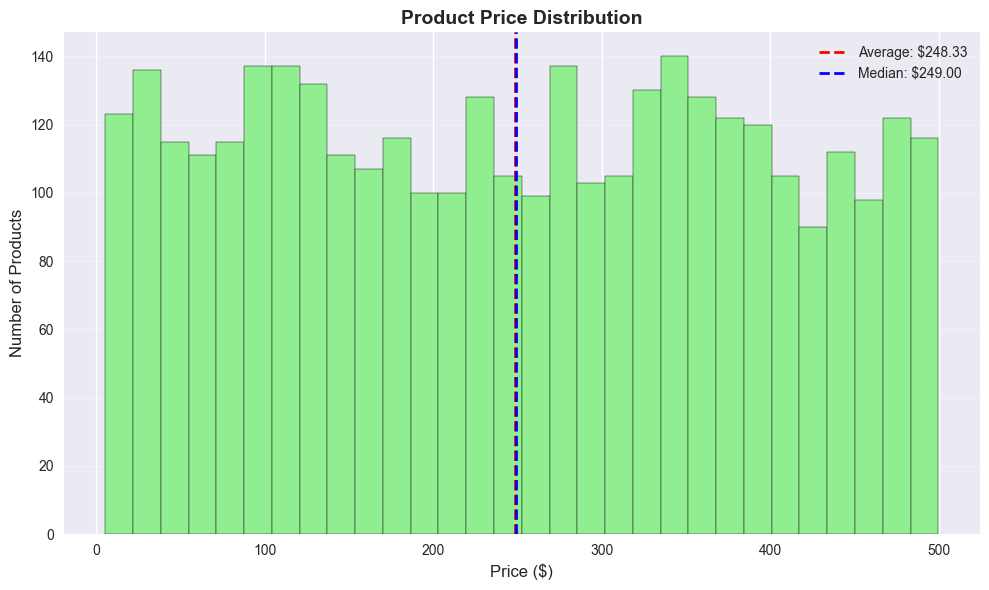

Red line = average price (mean)
Blue line = middle price (median)


In [25]:
# What's the typical price range of products?

plt.figure(figsize=(10, 6))
plt.hist(df['Price'], bins=30, color='lightgreen', edgecolor='black')
plt.axvline(df['Price'].mean(), color='red', linestyle='--',
            linewidth=2, label=f'Average: ${df["Price"].mean():.2f}')
plt.axvline(df['Price'].median(), color='blue', linestyle='--',
            linewidth=2, label=f'Median: ${df["Price"].median():.2f}')
plt.xlabel('Price ($)', fontsize=12)
plt.ylabel('Number of Products', fontsize=12)
plt.title('Product Price Distribution', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print("Red line = average price (mean)")
print("Blue line = middle price (median)")

Visualization 5: Gender vs Product Category

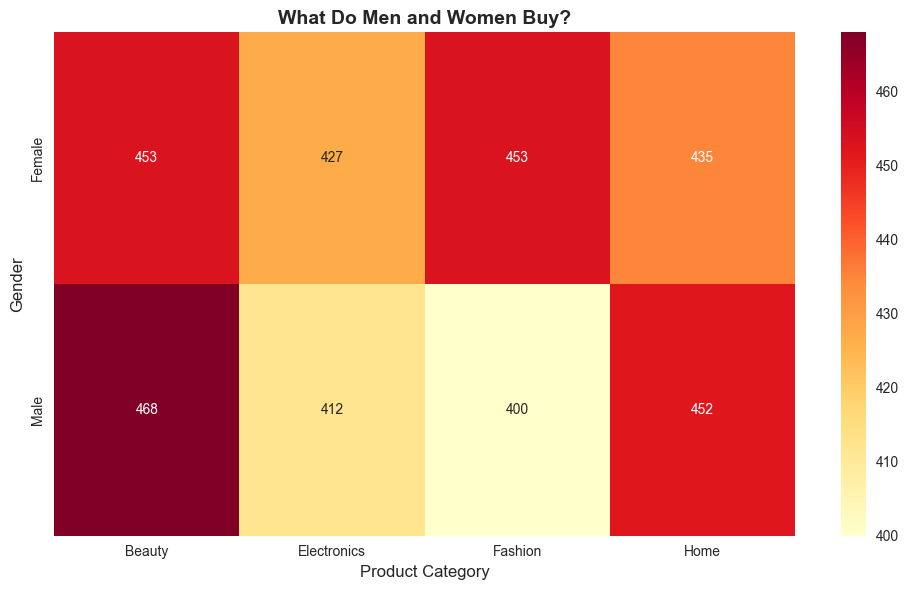

Numbers show how many purchases each gender made in each category.
Darker colors = more purchases


In [26]:
# Do men and women buy different things?

plt.figure(figsize=(10, 6))
gender_category = pd.crosstab(df['Gender'], df['Category'])
sns.heatmap(gender_category, annot=True, fmt='d', cmap='YlOrRd')
plt.title('What Do Men and Women Buy?', fontsize=14, fontweight='bold')
plt.xlabel('Product Category', fontsize=12)
plt.ylabel('Gender', fontsize=12)
plt.tight_layout()
plt.show()

print("Numbers show how many purchases each gender made in each category.")
print("Darker colors = more purchases")

Visualization 6: Payment Methods

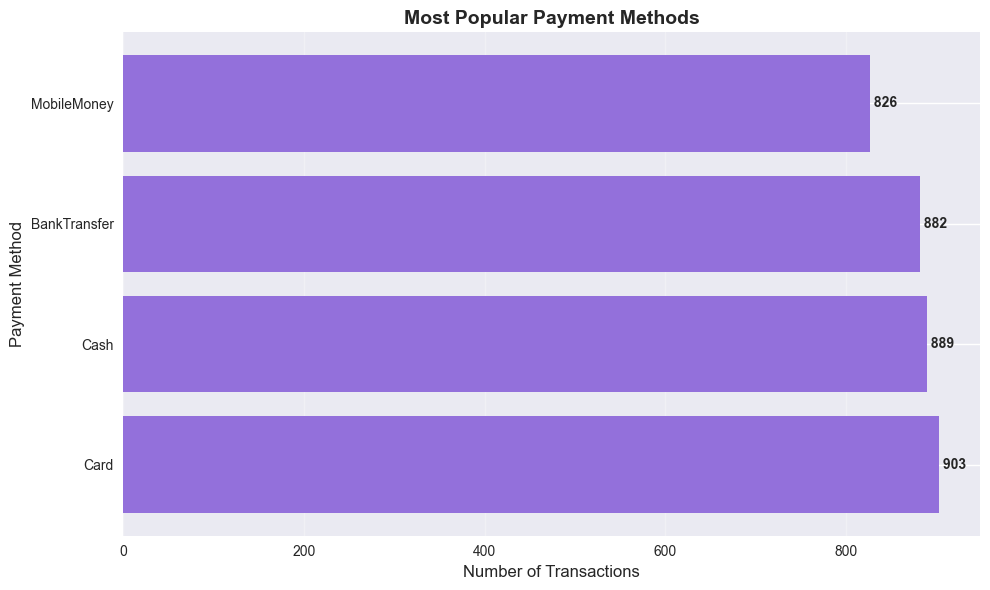

In [27]:
# How do customers prefer to pay?

plt.figure(figsize=(10, 6))
payment_counts = df['PaymentMethod'].value_counts()
plt.barh(payment_counts.index, payment_counts.values, color='mediumpurple')
plt.xlabel('Number of Transactions', fontsize=12)
plt.ylabel('Payment Method', fontsize=12)
plt.title('Most Popular Payment Methods', fontsize=14, fontweight='bold')
plt.grid(axis='x', alpha=0.3)

# Add value labels
for i, v in enumerate(payment_counts.values):
    plt.text(v, i, f' {v}', va='center', fontweight='bold')

plt.tight_layout()
plt.show()

### Finding Interesting Patterns

Pattern 1: Age Groups

In [28]:
# Let's group customers by age

# Create age groups
df['Age_Group'] = pd.cut(df['Age'].dropna(),
                         bins=[0, 25, 35, 45, 55, 100],
                         labels=['18-25', '26-35', '36-45', '46-55', '56+'])

print("\n--- Sales by Age Group ---")
age_group_sales = df.groupby('Age_Group')['TotalAmount'].sum()
print(age_group_sales)


--- Sales by Age Group ---
Age_Group
18-25    420600.25
26-35    477297.81
36-45    801265.92
46-55    469231.30
56+      441752.27
Name: TotalAmount, dtype: float64


C:\Users\sumai\AppData\Local\Temp\ipykernel_11660\2788981107.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_sales = df.groupby('Age_Group')['TotalAmount'].sum()


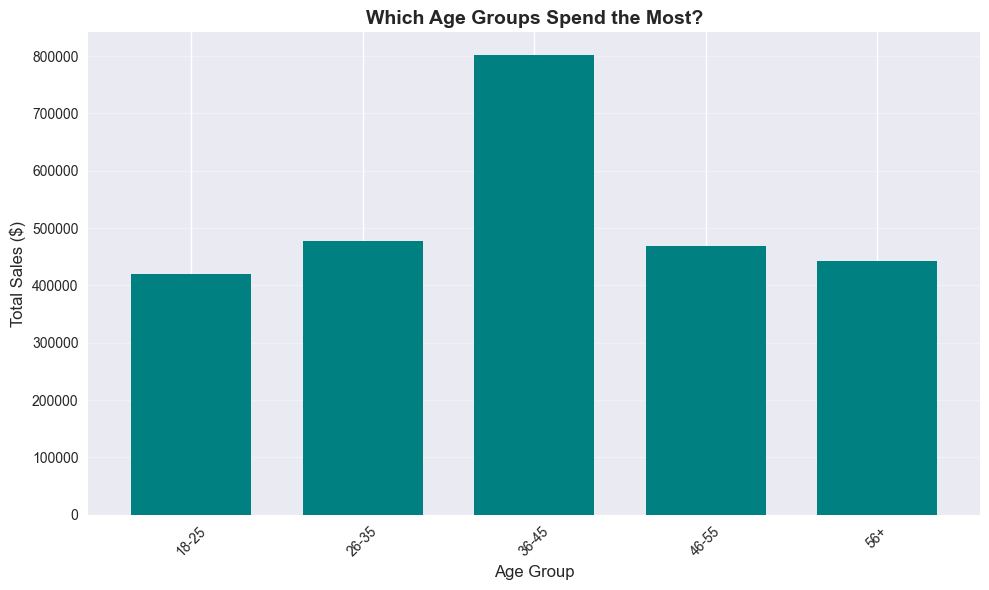

In [28]:
plt.figure(figsize=(10, 6))
age_group_sales.plot(kind='bar', color='teal', width=0.7)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Total Sales ($)', fontsize=12)
plt.title('Which Age Groups Spend the Most?', fontsize=14, fontweight='bold')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

Pattern 2: Product Category Details

In [27]:
# Deep dive into each category

print("\n--- Category Analysis ---")
category_analysis = df.groupby('Category').agg({
    'TotalAmount': ['sum', 'mean'],
    'OrderID': 'count',
    'Quantity': 'sum'
}).round(2)
category_analysis.columns = ['Total Sales', 'Avg Sale', 'Num Orders', 'Items Sold']
category_analysis = category_analysis.sort_values('Total Sales', ascending=False)
print(category_analysis)


--- Category Analysis ---
             Total Sales  Avg Sale  Num Orders  Items Sold
Category                                                  
Beauty         675697.16    733.66         921        2729
Home           675625.06    761.70         887        2666
Fashion        651338.42    763.59         853        2571
Electronics    607486.91    724.06         839        2556


### Key Findings Summary

In [28]:
# Let's summarize our discoveries

print("\n" + "="*60)
print("KEY FINDINGS FROM OUR ANALYSIS")
print("="*60)

print("\n1. OVERALL BUSINESS")
print("-" * 40)
print(f"   Total Revenue: ${df['TotalAmount'].sum():,.2f}")
print(f"   Total Transactions: {len(df):,}")
print(f"   Average Sale: ${df['TotalAmount'].mean():.2f}")

print("\n3. CUSTOMER INSIGHTS")
print("-" * 40)
print(f"   Average Age: {df['Age'].mean():.1f} years")
print(f"   Gender Split:")
for gender, count in df['Gender'].value_counts().items():
    pct = (count / len(df)) * 100
    print(f"      {gender}: {pct:.1f}%")

print("\n4. PRICING")
print("-" * 40)
print(f"   Average Price: ${df['Price'].mean():.2f}")
print(f"   Price Range: ${df['Price'].min():.2f} - ${df['Price'].max():.2f}")
print(f"   Average Items per Order: {df['Quantity'].mean():.2f}")

print("\n5. REGIONAL BREAKDOWN")
print("-" * 40)
for region in df['Region'].unique():
    region_total = df[df['Region'] == region]['TotalAmount'].sum()
    region_pct = (region_total / df['TotalAmount'].sum()) * 100
    print(f"   {region}: ${region_total:,.2f} ({region_pct:.1f}%)")


KEY FINDINGS FROM OUR ANALYSIS

1. OVERALL BUSINESS
----------------------------------------
   Total Revenue: $2,610,147.55
   Total Transactions: 3,500
   Average Sale: $745.76

3. CUSTOMER INSIGHTS
----------------------------------------
   Average Age: 40.9 years
   Gender Split:
      Female: 50.5%
      Male: 49.5%

4. PRICING
----------------------------------------
   Average Price: $248.33
   Price Range: $5.20 - $499.90
   Average Items per Order: 3.01

5. REGIONAL BREAKDOWN
----------------------------------------
   East: $652,270.37 (25.0%)
   North: $641,732.68 (24.6%)
   South: $647,359.17 (24.8%)
   West: $668,785.33 (25.6%)


Questions to Explore Next:

Now that you understand the basics, try answering these questions:

1. Which specific products are bestsellers?
2. Do certain regions prefer certain payment methods?
3. Is there a relationship between age and spending amount?
4. What's the typical order size in each region?
5. Do men and women have different average transaction values?

Try creating charts and calculations to answer these!

### End-of-day Task

 Your turn! Try these:
1. Find the most expensive product in each category
2. Calculate average age by region
3. Find which product category is most popular in each region
4. Compare average transaction value between genders

### My Task: Solving The Given Required Questions

1. Identify the most expensive product in each category.

         Category         Product   Price
1485       Beauty      Makeup Kit  499.62
2690  Electronics          Tablet  499.64
3135      Fashion           Jeans  498.58
321          Home  Vacuum Cleaner  499.90


C:\Users\sumai\AppData\Local\Temp\ipykernel_11660\500082123.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(x='Category', y='Price', data=most_expensive, palette='coolwarm')


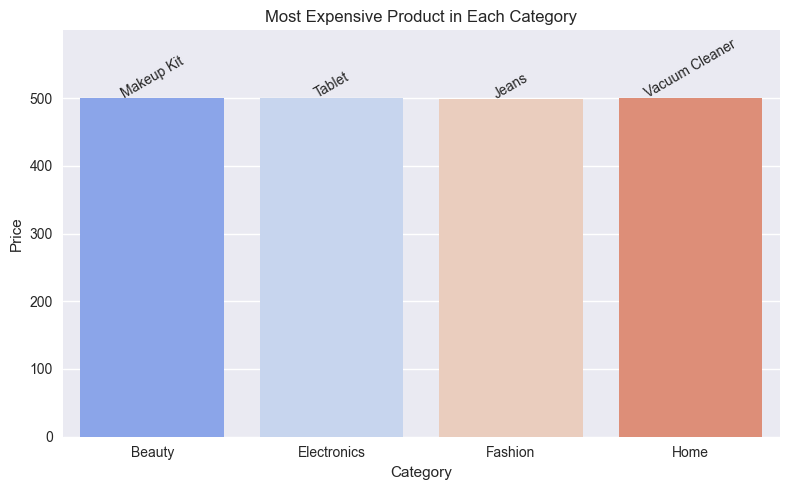

In [31]:
# Method 1: Using groupby + idxmax 
most_expensive = df.loc[df.groupby('Category')['Price'].idxmax(), ['Category', 'Product', 'Price']] 

print(most_expensive)

# Vertical bar chart
plt.figure(figsize=(8,5))
bars = sns.barplot(x='Category', y='Price', data=most_expensive, palette='coolwarm')

# Annotate bars with product names on top
for bar, product in zip(bars.patches, most_expensive['Product']):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.5, product, ha='center', fontsize=10, rotation=30)

plt.title('Most Expensive Product in Each Category')
plt.xlabel('Category')
plt.ylabel('Price')
plt.ylim(0, most_expensive['Price'].max() * 1.2)
plt.tight_layout()
plt.show()

2. Calculate the average age by region.

  Region    Age
0   East  41.10
1  North  41.31
2  South  40.93
3   West  40.16


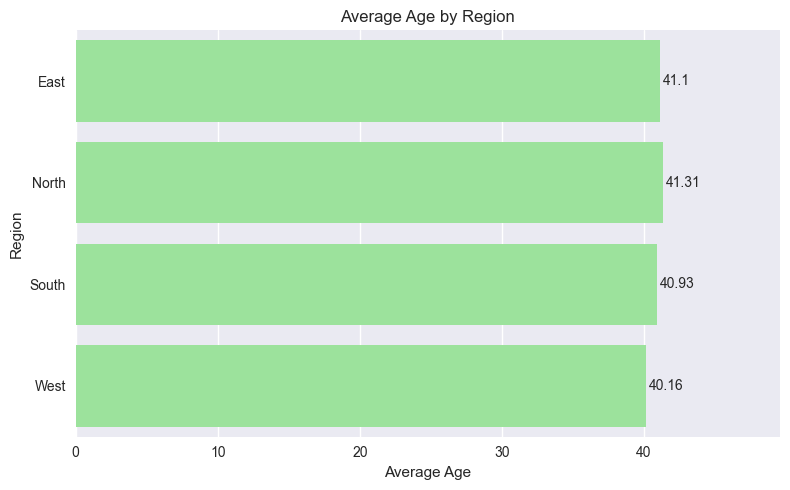

In [32]:
# Calculating average age by Region
avg_age_region = df.groupby('Region')['Age'].mean().reset_index()

# Optionally did: round the age for readability
avg_age_region['Age'] = avg_age_region['Age'].round(2)

print(avg_age_region)

# Horizontal bar chart for average age
plt.figure(figsize=(8,5))
bars = sns.barplot(x='Age', y='Region', data=avg_age_region, color='lightgreen')

# Annotate bars with average age values
for bar, age in zip(bars.patches, avg_age_region['Age']):
    width = bar.get_width()
    y = bar.get_y() + bar.get_height() / 2
    plt.text(width + 0.2, y, age, va='center', fontsize=10)

plt.title('Average Age by Region')
plt.xlabel('Average Age')
plt.ylabel('Region')
plt.xlim(0, avg_age_region['Age'].max() * 1.2)
plt.tight_layout()
plt.show()

3. Determine the most popular product category in each region.Determine the most popular product category in each region.

   Region Category  Quantity
3    East     Home       695
4   North   Beauty       671
8   South   Beauty       721
14   West  Fashion       700


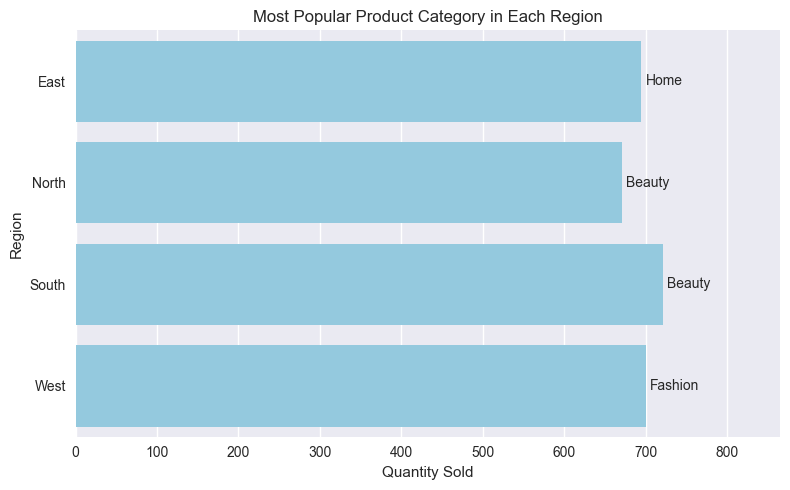

In [33]:
# Group by Region and Category, sum the Quantity
category_sales = df.groupby(['Region', 'Category'])['Quantity'].sum().reset_index()

# For each Region, finding the Category with maximum Quantity
most_popular = category_sales.loc[category_sales.groupby('Region')['Quantity'].idxmax(), ['Region', 'Category', 'Quantity']]

print(most_popular)

# Horizontal bar chart
plt.figure(figsize=(8,5))
bars = sns.barplot(x='Quantity', y='Region', data=most_popular, color='skyblue')

# Annotate bars correctly
for bar, category in zip(bars.patches, most_popular['Category']):
    width = bar.get_width()
    y = bar.get_y() + bar.get_height() / 2
    plt.text(width + 5, y, category, va='center', fontsize=10)

plt.title('Most Popular Product Category in Each Region')
plt.xlabel('Quantity Sold')
plt.ylabel('Region')
plt.xlim(0, most_popular['Quantity'].max() * 1.2)
plt.tight_layout()
plt.show()

4. Compare the average transaction value between genders.

   Gender  TotalAmount
0  Female       725.62
1    Male       766.31


C:\Users\sumai\AppData\Local\Temp\ipykernel_11660\2240128428.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Gender', y='TotalAmount', data=avg_transaction_gender, palette=colors)


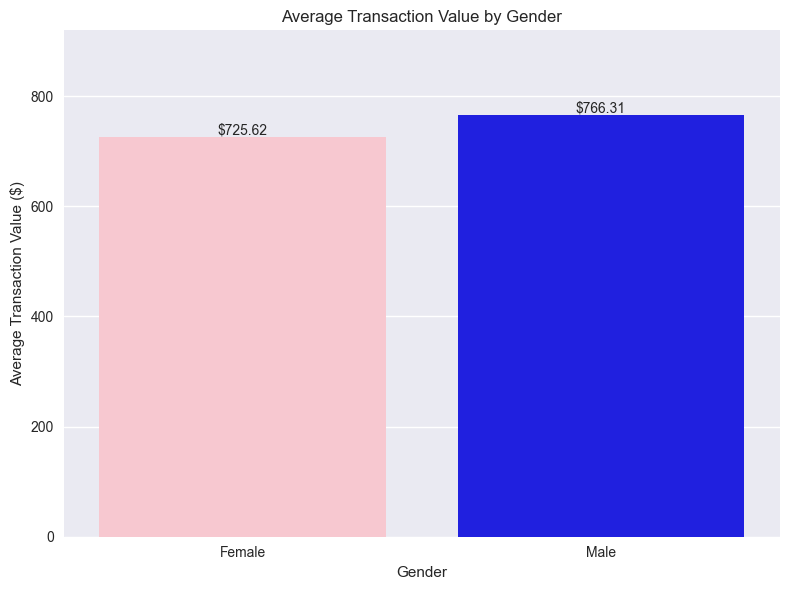

In [34]:
# Calculate average transaction value by Gender
avg_transaction_gender = df.groupby('Gender')['TotalAmount'].mean().reset_index()

# Optional: round the values for readability
avg_transaction_gender['TotalAmount'] = avg_transaction_gender['TotalAmount'].round(2)

print(avg_transaction_gender)

# Assign colors: Male = Blue, Female = Pink
colors = ['pink' if gender == 'Female' else 'blue' for gender in avg_transaction_gender['Gender']]

# Visualization
plt.figure(figsize=(8,6))
sns.barplot(x='Gender', y='TotalAmount', data=avg_transaction_gender, palette=colors)

# Annotate bars with values
for index, row in avg_transaction_gender.iterrows():
    plt.text(x=index, y=row['TotalAmount'] + 5, s=f"${row['TotalAmount']}", ha='center', fontsize=10)

plt.title('Average Transaction Value by Gender')
plt.ylabel('Average Transaction Value ($)')
plt.xlabel('Gender')
plt.ylim(0, avg_transaction_gender['TotalAmount'].max() * 1.2)
plt.tight_layout()
plt.show()

### Tasks are Completed by me Successfully !

Exporting Cleaned Dataset

In [35]:
# Export the cleaned dataset to CSV
df.to_csv("Cleaned_Sales_Transactions_3500.csv", index=False)

print("Dataset successfully exported as 'Cleaned_Sales_Transactions_3500.csv'")

Dataset successfully exported as 'Cleaned_Sales_Transactions_3500.csv'
